In [1]:
library(repr)
library(dplyr)
library(Rmisc)
library(RColorBrewer)
library(ggplot2)
library(data.table)
df =fread('cleaned.csv')
str(df)
df$Episodes <- as.numeric(df$Episodes)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: lattice
Loading required package: plyr
------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last



Classes ‘data.table’ and 'data.frame':	3371 obs. of  11 variables:
 $ V1      : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Name    : chr  "Patalliro!" "Mahou no Princess Minky Momo" "Kikou Kantai Dairugger XV" "Ochamegami Monogatari: Korokoro Pollon" ...
 $ Studio  : chr  "Toei Animation" "Production Reed" "Toei Animation" "-" ...
 $ Episodes: chr  "49" "63" "52" "46" ...
 $ Genres  : chr  "[Adventure, Comedy, Romance, Shoujo, Shounen Ai]" "[Magic, Shoujo]" "[Action, Adventure, Mecha, Sci-Fi, Shounen]" "[Parody, Magic, Comedy]" ...
 $ Source  : chr  "Manga" "Original" "-" "Manga" ...
 $ Type    : chr  "TV" "TV" "TV" "TV" ...
 $ Score   : num  7.62 6.77 6.56 7.13 6.38 ...
 $ Members : chr  "2,748" "2,524" "1,228" "1,169" ...
 $ Season  : chr  "Spring" "Spring" "Spring" "Spring" ...
 $ Year    : int  1982 1982 1982 1982 1982 1982 1982 1982 1982 1982 ...
 - attr(*, ".internal.selfref")=<externalptr> 


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

<h1> Distribution</h1>
Before starting, this is the dist of the shows grabbed over the years. I wrote a web scraper that randomly pulled from the past 30 years. This way, we can keep in mind why the data points look the way they do on the graphs.<br>

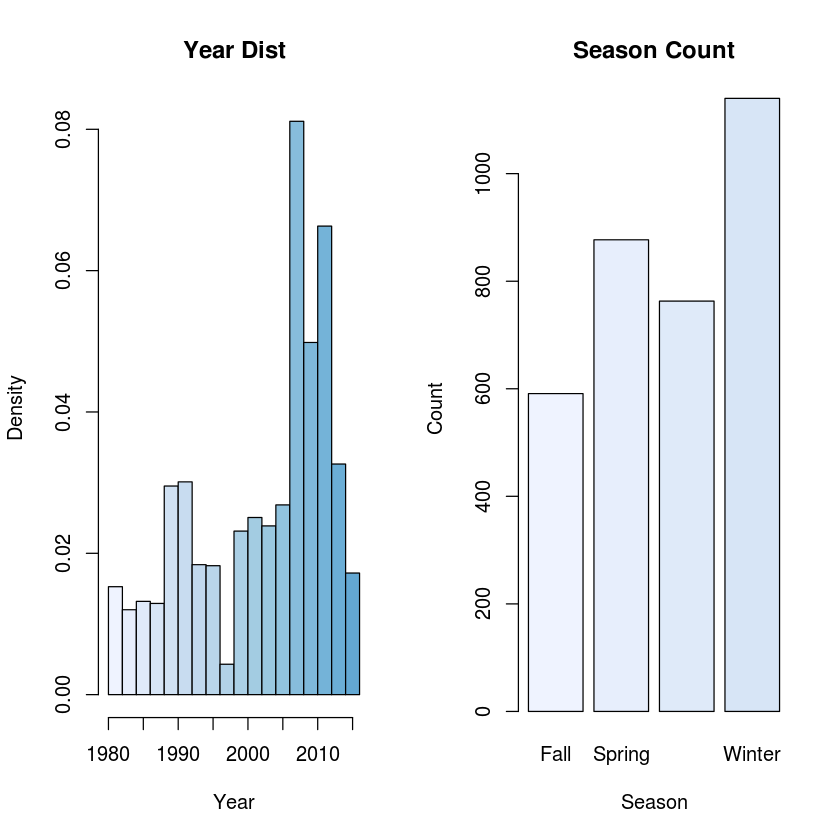

In [2]:
cols <- colorRampPalette(brewer.pal(7,"Blues"))(length(unique(df$Year)))
par(mfrow = c(1,2))
hist(df$Year,main = 'Year Dist',xlab = 'Year', freq = F,col = cols)
barplot(table(df$Season), main='Season Count',xlab = 'Season',ylab='Count', col=cols)

<h1>Golden age of anime?</h1>
Seems to be no particular high scoring season or year, standard deviation is quite small.
<br>No "Golden Age" of anime

In [3]:
temp <-df[,mean(Score),by=.(Season,Year)]
fit <- lm(Score~poly(Year,4),df)
confint(fit)
summary(temp$V1);sd(temp$V1);print('Confidence Interval of 97.5%');CI(temp$V1,.975)

,2.5 %,97.5 %
(Intercept),6.859740,6.9105282
"poly(Year, 4)1",4.294438,7.2431934
"poly(Year, 4)2",-1.923989,1.0247663
"poly(Year, 4)3",-5.685371,-2.7366156
"poly(Year, 4)4",-2.653054,0.2957011


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.388   6.726   6.815   6.833   6.931   7.189 

[1] 0.1775724

[1] "Confidence Interval of 97.5%"


upper     mean    lower 
6.881254 6.832981 6.784708

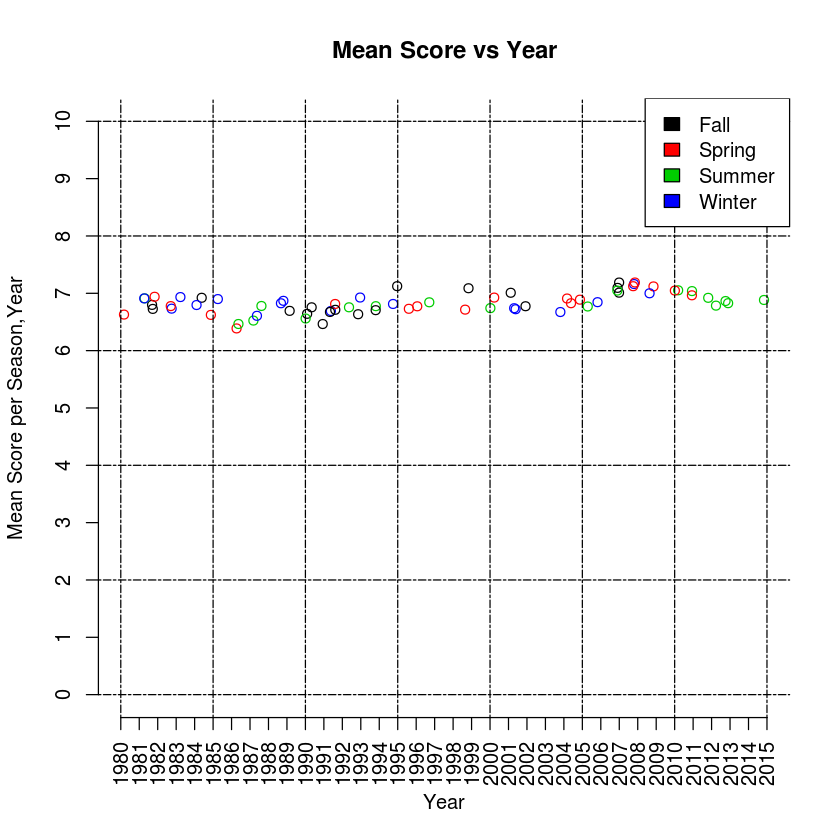

In [4]:
plot(V1~jitter(Year,2), xlab = "",ylab="",
     temp,
     ylim=c(0,10),
     axes = FALSE,
     col=1:length(unique(temp$Season)))
title(main = 'Mean Score vs Year',xlab = 'Year',ylab = 'Mean Score per Season,Year')
grid (NULL,NULL, lty = 6, col = "black") 
axis(1,at=seq(min(temp$Year),max(temp$Year)),las=3)
axis(2,at=seq(0,10),las=3)
legend('topright',legend=levels(as.factor(temp$Season)),fill=1:length(unique(temp$Season)) )

<h1>Members are the number of people who have rated a certain show.</h1><br>
This graph shows the total number of members per year. Seems as far as anime goes, the growth has been exponential after 2000

In [5]:
df$Members <- as.numeric(gsub(",", "", df$Members))
members <- df[,lapply(.SD,sum),by=Year,.SDcols='Members']
members <- members[order(Year,Members)]

In [6]:
fitsq=lm(Members~poly(Year,5),data=members)
predsq = predict(fitsq,newdata=members)
summary(fitsq)
confint(fitsq)


Call:
lm(formula = Members ~ poly(Year, 5), data = members)

Residuals:
     Min       1Q   Median       3Q      Max 
-4438905  -278213    10381   251887  5458555 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2952293     328448   8.989 1.33e-09 ***
poly(Year, 5)1 17426271    1886788   9.236 7.59e-10 ***
poly(Year, 5)2  5904914    1886788   3.130  0.00417 ** 
poly(Year, 5)3 -3236079    1886788  -1.715  0.09778 .  
poly(Year, 5)4 -6417159    1886788  -3.401  0.00210 ** 
poly(Year, 5)5 -3934948    1886788  -2.086  0.04660 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1887000 on 27 degrees of freedom
Multiple R-squared:  0.8085,	Adjusted R-squared:  0.773 
F-statistic: 22.79 on 5 and 27 DF,  p-value: 6.49e-09


,2.5 %,97.5 %
(Intercept),2278374,3626211.78
"poly(Year, 5)1",13554902,21297639.48
"poly(Year, 5)2",2033545,9776282.29
"poly(Year, 5)3",-7107448,635289.99
"poly(Year, 5)4",-10288528,-2545790.54
"poly(Year, 5)5",-7806317,-63579.33


<br>

In [7]:
fitlin=lm(Members~Year,data=members)
predlin = predict(fitlin,newdata=members)
summary(fitlin)
confint(fitlin)


Call:
lm(formula = Members ~ Year, data = members)

Residuals:
     Min       1Q   Median       3Q      Max 
-3852874 -1624982   -74473  1340541  6854080 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -579683227   84524985  -6.858 1.10e-07 ***
Year            291782      42329   6.893 9.95e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2528000 on 31 degrees of freedom
Multiple R-squared:  0.6052,	Adjusted R-squared:  0.5924 
F-statistic: 47.52 on 1 and 31 DF,  p-value: 9.952e-08


,2.5 %,97.5 %
(Intercept),-752073070.0,-407293383.2
Year,205450.9,378113.1


<h1> Member growth </h1>
Members are the amount of people who have put the show in their 'List'. This usually means, but not always, they have seen an episode of the show. By summing up the amount of members of each show for a given year, we can see the trend lines for anime growth, shown by both a polynomial fit and a linear fit. <br>
The formulas above indicate that the Linear fit is more statistically relevant than the polynomial fit, but as shown in the graphs, the data points start to get a little more sparse in the recent years.

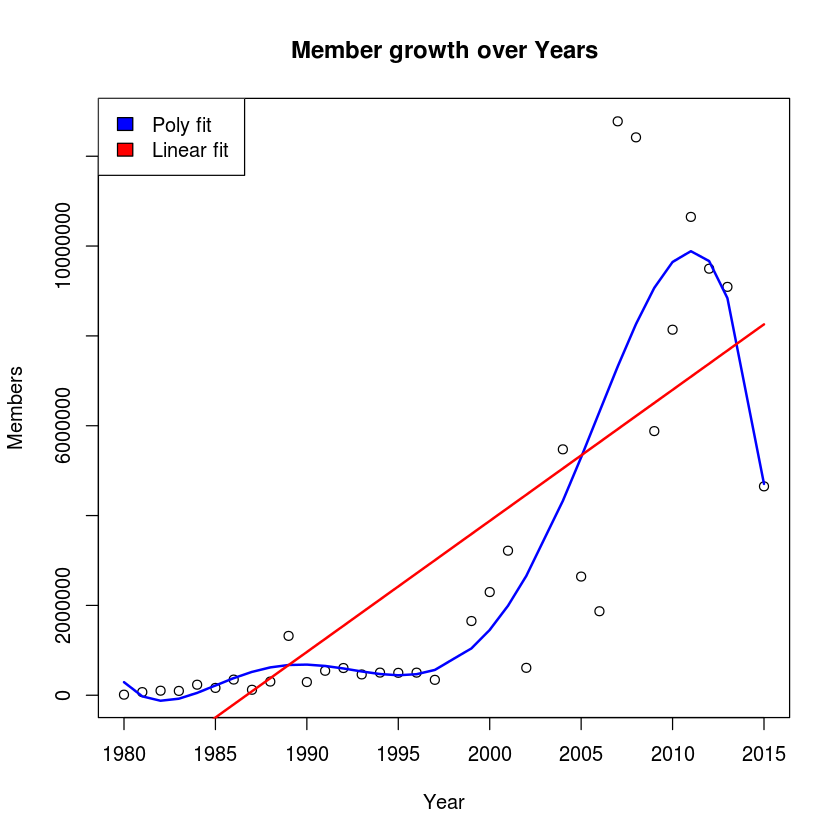

In [8]:
options(scipen=5)
plot(Members~Year,members)
title(main = 'Member growth over Years')
lines(members$Year,predsq,lwd=2,col='blue')
lines(members$Year,predlin,lwd=2,col='red')
legend('topleft',legend=c('Poly fit','Linear fit'),fill=c('blue','red'))

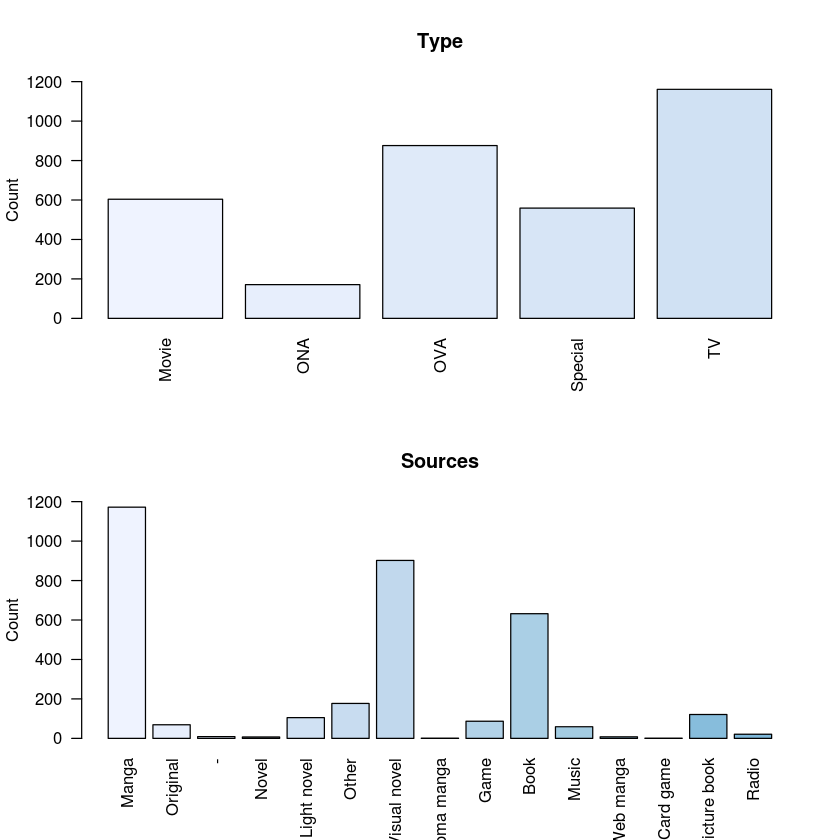

In [9]:
par(las=2)
layout(matrix(c(1,1,2,2), 2, 2, byrow = TRUE))
typeTable = table(df$Type)
sourceTable = table(df$Source)
barplot(typeTable,
        main = 'Type',
        ylab = 'Count', 
        col = cols,
        ylim=c(0,1200))

barplot(sourceTable, 
        main = 'Sources',
        ylim=c(0,1200),
        ylab='Count',
        names.arg = unlist(df[,lapply(.SD,unique),.SDcols='Source']),
        col=cols)

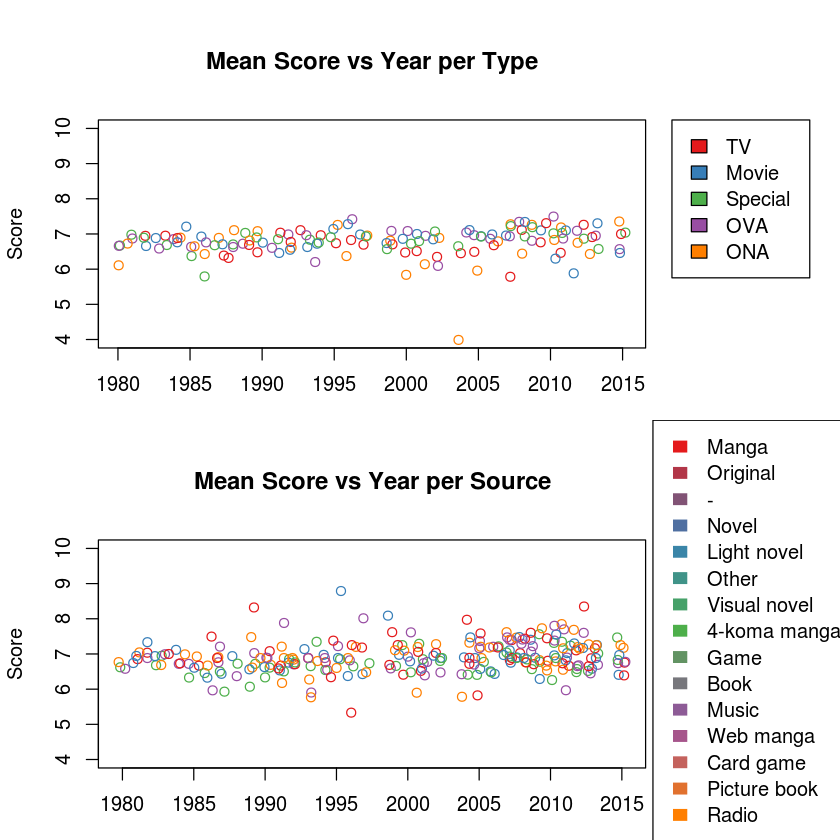

In [163]:
layout(matrix(c(1,1,2,2),2,2),heights = c(1,1),widths = c(2,2))
score.Type <- df[,lapply(.SD,mean),by=.(Type,Year),.SDcols = 'Score']
score.Source <- df[,lapply(.SD,mean),by=.(Source,Year),.SDcols = 'Score']
par(mar=c(3, 4.1, 5, 8.1), xpd=TRUE)
par(mfrow=c(2,1)) 

cols2 <- colorRampPalette(brewer.pal(5,'Set1'))(length(unique(score.Type$Type)))
plot(Score~jitter(Year,2),
     score.Type,
     ylim=c(4,10),
     col= cols2)
title(main ='Mean Score vs Year per Type' )
legend('topright',inset=c(-0.3,0),legend=unique(score.Type$Type),fill=cols2)

cols3 <- colorRampPalette(brewer.pal(5,'Set1'))(length(unique(score.Source$Source)))
plot(Score~jitter(Year,2),
     score.Source,
     ylim=c(4,10),
     col= cols2)
title(main='Mean Score vs Year per Source')
legend('topright',inset=c(-0.4,-.525),legend=unique(score.Source$Source),fill=cols3,border = 'white')

In [184]:
df[,order(table(df$Studio))]

[1]   5  11  12  17  20  21  22  25  26  27  28  30  31  32  33  35  36  38
 [19]  44  45  47  48  51  52  53  57  58  59  60  62  63  64  66  67  68  69
 [37]  70  72  74  75  76  78  80  81  82  84  85  86  88  90  91  95  97  99
 [55] 103 104 105 106 109 111 112 116 117 118 120 121 122 125 126 127 130 131
 [73] 133 134 135 138 141 144 145 146 147 148 149 152 153 155 156 157 158 160
 [91] 162 163 165 166 167 168 169 171 172 175 176 177 178 181 182 183 184 186
[109] 187 188 189 193 194 196 197 199 201 202 204 205 206 208 209 212 214 215
[127] 216 217 218 219 220 221 224 225 226 228 231 232 233 235 236 237 238 245
[145] 246 248 250 251 252 254 256 258 259 262 263 265 266 268 270 276 281 283
[163] 284 287 291 292 293 297 298 300 304 305 306 307 311 317 318 320   3   6
[181]   8  19  37  40  42  77  83  89  92  98 101 108 110 115 137 139 140 142
[199] 150 159 170 174 191 203 213 223 229 239 249 255 264 272 275 279 280 286
[217] 303 316  14  15  49  56  73 100 185 207 234 301 312   7  18  24  50  54
[235]  79 114 123 190 192 243 278 310 314  55 128 136 154 241 319  34 119 227
[253] 267 313   2  39  46 151 161 289 290 299 302 308   9 102 210  23 242 273
[271]  10  61 179  87 253  29 198 260 180 211 295  16 132  93 271 285  96 200
[289] 274 129  43  71 240 269 107 321  41 257 309 113 230  65 247  94 164   4
[307] 288 315 244  13 124 195 294 277 261 222 143 173 282 296   1